# Project: Investigate sugar consumption, BMI and health spending worldwide

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Wrangling and cleaning BMI data sets</a></li>
<li><a href="#wrangling2">Wrangling and cleaning sugar consumption data</a></li>
<li><a href="#wrangling3">Wrangling and cleaning health spending data</a></li> 
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Throughout this report, we will investigate the correlation between sugar, obesity and health spending per person. We will identify how results differ across over 100 countries and see if there are any trends that can be spotted over time. The data analysed has been curated from Gapminder and spans the decade from 1995 – 2004. 


In [718]:
# import statements for all of the packages used 
import pandas as pd
import numpy as np 
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
pd.options.mode.chained_assignment = None  # default='warn'

<a id='wrangling'></a>

## Wranging and cleaning BMI data sets

In [719]:
# Load BMI data sets...
bmi_f = pd.read_csv('bmi_female.csv')
bmi_m = pd.read_csv('bmi_male.csv')
bmi_m.head()

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,21.48678,21.46552,21.45145,21.43822,21.42734,21.41222,21.40132,21.37679,21.34018,...,20.75469,20.69521,20.62643,20.59848,20.58706,20.57759,20.58084,20.58749,20.60246,20.62058
1,Albania,25.22533,25.23981,25.25636,25.27176,25.27901,25.28669,25.29451,25.30217,25.30450,...,25.46555,25.55835,25.66701,25.77167,25.87274,25.98136,26.08939,26.20867,26.32753,26.44657
2,Algeria,22.25703,22.34745,22.43647,22.52105,22.60633,22.69501,22.76979,22.84096,22.90644,...,23.69486,23.77659,23.86256,23.95294,24.05243,24.15957,24.27001,24.38270,24.48846,24.59620
3,Andorra,25.66652,25.70868,25.74681,25.78250,25.81874,25.85236,25.89089,25.93414,25.98477,...,26.75078,26.83179,26.92373,27.02525,27.12481,27.23107,27.32827,27.43588,27.53363,27.63048
4,Angola,20.94876,20.94371,20.93754,20.93187,20.93569,20.94857,20.96030,20.98025,21.01375,...,21.31954,21.37480,21.43664,21.51765,21.59924,21.69218,21.80564,21.93881,22.08962,22.25083


In [720]:
bmi_f.head()

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Afghanistan,20.44348,20.47765,20.52292,20.56493,20.60867,20.64796,20.68983,20.70902,20.71512,...,20.61717,20.61850,20.61353,20.65274,20.70828,20.76927,20.83858,20.91021,20.99060,21.07402
1,Albania,25.17427,25.19088,25.20032,25.21906,25.22359,25.21257,25.20939,25.18918,25.16965,...,25.06254,25.12797,25.20332,25.27082,25.33198,25.39804,25.46525,25.53328,25.59394,25.65726
2,Algeria,23.67764,23.80702,23.92626,24.03604,24.13630,24.24213,24.33652,24.42523,24.50904,...,25.40139,25.49389,25.59477,25.69948,25.81168,25.93081,26.03886,26.15054,26.26096,26.36841
3,Andorra,25.67324,25.69018,25.69922,25.70089,25.70584,25.70877,25.71239,25.72437,25.74523,...,26.07432,26.10622,26.14707,26.19542,26.23892,26.28851,26.32247,26.36846,26.40095,26.43196
4,Angola,20.06763,20.12766,20.19464,20.26439,20.34110,20.42624,20.51389,20.60929,20.70945,...,21.76054,21.91293,22.07646,22.26093,22.44571,22.63536,22.83412,23.04406,23.26330,23.48431


In [721]:
#check number of rows and columns in each BMI data set
bmi_m.shape

(199, 30)

In [722]:
bmi_f.shape

(199, 30)

In [723]:
#check for missing values and data types
bmi_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 30 columns):
country    199 non-null object
1980       199 non-null float64
1981       199 non-null float64
1982       199 non-null float64
1983       199 non-null float64
1984       199 non-null float64
1985       199 non-null float64
1986       199 non-null float64
1987       199 non-null float64
1988       199 non-null float64
1989       199 non-null float64
1990       199 non-null float64
1991       199 non-null float64
1992       199 non-null float64
1993       199 non-null float64
1994       199 non-null float64
1995       199 non-null float64
1996       199 non-null float64
1997       199 non-null float64
1998       199 non-null float64
1999       199 non-null float64
2000       199 non-null float64
2001       199 non-null float64
2002       199 non-null float64
2003       199 non-null float64
2004       199 non-null float64
2005       199 non-null float64
2006       199 non-null float64


In [724]:
bmi_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 30 columns):
country    199 non-null object
1980       199 non-null float64
1981       199 non-null float64
1982       199 non-null float64
1983       199 non-null float64
1984       199 non-null float64
1985       199 non-null float64
1986       199 non-null float64
1987       199 non-null float64
1988       199 non-null float64
1989       199 non-null float64
1990       199 non-null float64
1991       199 non-null float64
1992       199 non-null float64
1993       199 non-null float64
1994       199 non-null float64
1995       199 non-null float64
1996       199 non-null float64
1997       199 non-null float64
1998       199 non-null float64
1999       199 non-null float64
2000       199 non-null float64
2001       199 non-null float64
2002       199 non-null float64
2003       199 non-null float64
2004       199 non-null float64
2005       199 non-null float64
2006       199 non-null float64


> This data looks nice and clean...we'll filter it to get only the years we want to analyse. 

In [725]:
bmi_m_filtered = bmi_m.iloc[:,np.r_[0:1,16:26]]
bmi_m_filtered.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
0,Afghanistan,20.91132,20.85155,20.81307,20.78591,20.75469,20.69521,20.62643,20.59848,20.58706,20.57759
1,Albania,25.25874,25.31097,25.33988,25.39116,25.46555,25.55835,25.66701,25.77167,25.87274,25.98136
2,Algeria,23.39526,23.46811,23.54160,23.61592,23.69486,23.77659,23.86256,23.95294,24.05243,24.15957
3,Andorra,26.43569,26.50769,26.58255,26.66337,26.75078,26.83179,26.92373,27.02525,27.12481,27.23107
4,Angola,21.16022,21.19076,21.22621,21.27082,21.31954,21.37480,21.43664,21.51765,21.59924,21.69218


In [726]:
bmi_f_filtered = bmi_f.iloc[:, np.r_[0:1,16:26]]
bmi_f_filtered.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
0,Afghanistan,20.56750,20.55575,20.56759,20.59306,20.61717,20.61850,20.61353,20.65274,20.70828,20.76927
1,Albania,24.93706,24.96643,24.96754,25.00220,25.06254,25.12797,25.20332,25.27082,25.33198,25.39804
2,Algeria,25.07258,25.15000,25.22635,25.30970,25.40139,25.49389,25.59477,25.69948,25.81168,25.93081
3,Andorra,25.93933,25.96645,25.99661,26.03351,26.07432,26.10622,26.14707,26.19542,26.23892,26.28851
4,Angola,21.25985,21.36478,21.47863,21.60939,21.76054,21.91293,22.07646,22.26093,22.44571,22.63536


> We'll merge the two datasets together and create a new column that indicates whether the BMI is for males or females. That way we'll be able to expand the breadth of the questions we can answer later on.

In [727]:
# create gender array for male dataframe
gender_male = np.array(['male'])

# create gender array for female dataframe
gender_female = np.array(['female'])


In [728]:
# add the new arrays to each of the dataframes
bmi_m_filtered['gender'] = np.repeat(gender_male, 199, axis=None)

bmi_m_filtered.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,gender
0,Afghanistan,20.91132,20.85155,20.81307,20.78591,20.75469,20.69521,20.62643,20.59848,20.58706,20.57759,male
1,Albania,25.25874,25.31097,25.33988,25.39116,25.46555,25.55835,25.66701,25.77167,25.87274,25.98136,male
2,Algeria,23.39526,23.46811,23.54160,23.61592,23.69486,23.77659,23.86256,23.95294,24.05243,24.15957,male
3,Andorra,26.43569,26.50769,26.58255,26.66337,26.75078,26.83179,26.92373,27.02525,27.12481,27.23107,male
4,Angola,21.16022,21.19076,21.22621,21.27082,21.31954,21.37480,21.43664,21.51765,21.59924,21.69218,male


In [729]:
bmi_f_filtered['gender'] = np.repeat(gender_female, 199, axis=None)

bmi_f_filtered.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,gender
0,Afghanistan,20.56750,20.55575,20.56759,20.59306,20.61717,20.61850,20.61353,20.65274,20.70828,20.76927,female
1,Albania,24.93706,24.96643,24.96754,25.00220,25.06254,25.12797,25.20332,25.27082,25.33198,25.39804,female
2,Algeria,25.07258,25.15000,25.22635,25.30970,25.40139,25.49389,25.59477,25.69948,25.81168,25.93081,female
3,Andorra,25.93933,25.96645,25.99661,26.03351,26.07432,26.10622,26.14707,26.19542,26.23892,26.28851,female
4,Angola,21.25985,21.36478,21.47863,21.60939,21.76054,21.91293,22.07646,22.26093,22.44571,22.63536,female


### Combine DataFrames with Append
>Now it's time to save this out as one dataframe

In [730]:
# append dataframes
bmi = bmi_f_filtered.append(bmi_m_filtered, ignore_index=True)

# view dataframe to check for success
bmi.sort_values(by=['country'])

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,gender
0,Afghanistan,20.56750,20.55575,20.56759,20.59306,20.61717,20.61850,20.61353,20.65274,20.70828,20.76927,female
199,Afghanistan,20.91132,20.85155,20.81307,20.78591,20.75469,20.69521,20.62643,20.59848,20.58706,20.57759,male
1,Albania,24.93706,24.96643,24.96754,25.00220,25.06254,25.12797,25.20332,25.27082,25.33198,25.39804,female
200,Albania,25.25874,25.31097,25.33988,25.39116,25.46555,25.55835,25.66701,25.77167,25.87274,25.98136,male
2,Algeria,25.07258,25.15000,25.22635,25.30970,25.40139,25.49389,25.59477,25.69948,25.81168,25.93081,female
201,Algeria,23.39526,23.46811,23.54160,23.61592,23.69486,23.77659,23.86256,23.95294,24.05243,24.15957,male
3,Andorra,25.93933,25.96645,25.99661,26.03351,26.07432,26.10622,26.14707,26.19542,26.23892,26.28851,female
202,Andorra,26.43569,26.50769,26.58255,26.66337,26.75078,26.83179,26.92373,27.02525,27.12481,27.23107,male
4,Angola,21.25985,21.36478,21.47863,21.60939,21.76054,21.91293,22.07646,22.26093,22.44571,22.63536,female
203,Angola,21.16022,21.19076,21.22621,21.27082,21.31954,21.37480,21.43664,21.51765,21.59924,21.69218,male


In [731]:
# check for duplicate data
print(bmi.duplicated().sum())

0


<a id='wrangling2'></a>

## Wrangling & Cleaning Sugar Consumption Data

> At first glance, it looks like there is a lot of missing values for some countries. We have data from 1961 - 2004. We will narrow the sample size down to 1995 - 2004 and further assess the missing values to see what we need to clean. 

In [732]:
# Loading sugar data set and setting encoding properties so we can read the data
sugar_intake = pd.read_csv('sugar_consumption.csv',encoding = 'latin1')
sugar_intake.head()
sugar_intake.shape

(259, 45)

In [733]:
sugar_intake.head()

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,30.14,30.14,32.88,35.62,35.62,35.62,38.36,38.36,38.36,...,54.80,68.49,60.27,60.27,57.53,65.75,68.49,71.23,65.75,65.75
4,Algeria,46.58,49.32,46.58,49.32,46.58,46.58,49.32,49.32,46.58,...,73.97,73.97,79.45,54.80,60.27,82.19,79.45,82.19,84.93,84.93


In [734]:
# Refining sample size to 1995 - 2004
sugar_intake_filtered = sugar_intake.iloc[:,np.r_[0:1,35:45]]
# confirm changes
sugar_intake_filtered.head(10)

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,54.80,68.49,60.27,60.27,57.53,65.75,68.49,71.23,65.75,65.75
4,Algeria,73.97,73.97,79.45,54.80,60.27,82.19,79.45,82.19,84.93,84.93
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Angola,24.66,27.40,32.88,30.14,38.36,27.40,32.88,35.62,35.62,35.62
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Antigua and Barbuda,90.41,90.41,87.67,93.15,90.41,93.15,93.15,93.15,95.89,95.89


> Asessing sugar consumption data set: It looks like the data set is good for 174 countries. We will narrow down the number of countries we analyse to those countries with sugar consumption data across the 10 years. 


In [735]:
# Asess missing data
sugar_intake_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 11 columns):
country    259 non-null object
1995       174 non-null float64
1996       175 non-null float64
1997       175 non-null float64
1998       175 non-null float64
1999       175 non-null float64
2000       175 non-null float64
2001       175 non-null float64
2002       175 non-null float64
2003       175 non-null float64
2004       175 non-null float64
dtypes: float64(10), object(1)
memory usage: 22.3+ KB


In [736]:
sugar_intake_cleaned = sugar_intake_filtered.dropna()
sugar_intake_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174 entries, 3 to 257
Data columns (total 11 columns):
country    174 non-null object
1995       174 non-null float64
1996       174 non-null float64
1997       174 non-null float64
1998       174 non-null float64
1999       174 non-null float64
2000       174 non-null float64
2001       174 non-null float64
2002       174 non-null float64
2003       174 non-null float64
2004       174 non-null float64
dtypes: float64(10), object(1)
memory usage: 16.3+ KB


In [737]:
# check for duplicate data
print(sugar_intake_cleaned.duplicated().sum())

0


<a id='wrangling3'></a>

## Data Wrangling & Cleaning: Government expenditure on health per person

In [738]:
# Loading sugar data set and setting encoding properties so we can read the data
health_spend_pp = pd.read_csv('per_capita_gov_health_exp.csv',encoding = 'latin1')
health_spend_pp.head()

,Per capita government expenditure on health (PPP int. $),1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.242622,2.026442,2.509185,4.109661,4.272342,4.908018,4.503357,5.283590,5.182912
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,52.879198,57.820171,61.198199,72.681838,97.480268,96.169145,106.617371,109.305126,117.163233,150.919447,163.455314,177.651490,188.811412,220.964114,243.567487,225.381942
4,Algeria,144.894780,140.047446,145.827243,152.050691,147.600449,137.917782,164.337031,174.171852,184.789246,161.443126,159.639324,173.091882,211.124202,238.136941,289.061074,257.052609


> At first glance, it looks like we're missing a lot of values for some countries.

In [739]:
# identifying missing values 
health_spend_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 17 columns):
Per capita government expenditure on health (PPP int. $)    262 non-null object
1995                                                        189 non-null float64
1996                                                        190 non-null float64
1997                                                        190 non-null float64
1998                                                        191 non-null float64
1999                                                        191 non-null float64
2000                                                        191 non-null float64
2001                                                        191 non-null float64
2002                                                        190 non-null float64
2003                                                        190 non-null float64
2004                                                        190 non-null float64
2005 

> We'll filter this to get only the years we need for our analysis and we'll drop all the countries with missing data. 

In [740]:
#finding number of rows and columns
health_spend_pp.shape

(262, 17)

In [741]:
#selecting all rows and only the columns we need
health_spend_filtered = health_spend_pp.iloc[:, np.r_[0:1,1:11]]

In [742]:
# renaming first column to match the other data sets and call it 'country'. 
health_spend_filtered.rename(columns={'Per capita government expenditure on health (PPP int. $)':'country'}, inplace=True)
health_spend_filtered.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.242622,2.026442,2.509185
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,52.879198,57.820171,61.198199,72.681838,97.480268,96.169145,106.617371,109.305126,117.163233,150.919447
4,Algeria,144.894780,140.047446,145.827243,152.050691,147.600449,137.917782,164.337031,174.171852,184.789246,161.443126


In [743]:
# removing rows for missing country data 
health_spend = health_spend_filtered.dropna()
# checking the data
health_spend.shape

(187, 11)

In [744]:
health_spend.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
3,Albania,52.879198,57.820171,61.198199,72.681838,97.480268,96.169145,106.617371,109.305126,117.163233,150.919447
4,Algeria,144.894780,140.047446,145.827243,152.050691,147.600449,137.917782,164.337031,174.171852,184.789246,161.443126
6,Andorra,946.485930,1041.121110,1182.021924,1671.310190,1207.321175,1274.912000,1343.584926,1481.158594,1526.308695,1610.047556
7,Angola,59.537146,33.103587,37.484016,30.427416,32.882221,44.571775,70.317526,49.957804,58.435234,47.883027
9,Antigua and Barbuda,333.513009,322.409192,348.115067,369.601789,391.490098,403.456767,379.832018,388.005263,411.671096,436.695075


In [745]:
# check for duplicate data
print(health_spend.duplicated().sum())

0


Great - that's four data sets cleaned up a little...now we'll refine that by bringing them all together. 

###  Merging data for BMI, health spend per peson and sugar intake
We'll merge our three data sets using the country column in each. During the merge, we'll remove any countries that don't have values across all three data sets. 

In [746]:
# create columns for each of the data sets

In [747]:
sugar_consumption = pd.melt(sugar_intake_cleaned, id_vars=["country"], 
                            var_name="year", value_name="sugar consumption")
sugar_consumption.head()

,country,year,sugar consumption
0,Albania,1995,54.80
1,Algeria,1995,73.97
2,Angola,1995,24.66
3,Antigua and Barbuda,1995,90.41
4,Argentina,1995,128.77


In [748]:
health_spend_pp = pd.melt(health_spend, id_vars=["country"], 
                            var_name="year", value_name="health spend per person")
health_spend_pp.head()

,country,year,health spend per person
0,Albania,1995,52.879198
1,Algeria,1995,144.894780
2,Andorra,1995,946.485930
3,Angola,1995,59.537146
4,Antigua and Barbuda,1995,333.513009


In [749]:
#include the new gender column as well as country
bmi_avg = pd.melt(bmi, id_vars=["country", "gender"], 
                            var_name="year", value_name="bmi")
bmi_avg.head()

,country,gender,year,bmi
0,Afghanistan,female,1995,20.56750
1,Albania,female,1995,24.93706
2,Algeria,female,1995,25.07258
3,Andorra,female,1995,25.93933
4,Angola,female,1995,21.25985


In [750]:
#join the three dataframes together and set the index to country

sugar_health = pd.merge(sugar_consumption, health_spend_pp, on=['year', 'country'])

# add bmi - column  
whs = pd.merge(bmi_avg, sugar_health, on=['year', 'country'])

# set the index to country
whs_country = whs.set_index(['country', 'year', 'gender'])

#check for missing data from countries that did not have a match across all three 
whs_country.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3120 entries, (Albania, 1995, female) to (Zambia, 2004, male)
Data columns (total 3 columns):
bmi                        3120 non-null float64
sugar consumption          3120 non-null float64
health spend per person    3120 non-null float64
dtypes: float64(3)
memory usage: 86.8+ KB


In [751]:
whs_country.head()

bmi  sugar consumption  health spend per person
country year gender                                                      
Albania 1995 female  24.93706              54.80                52.879198
             male    25.25874              54.80                52.879198
Algeria 1995 female  25.07258              73.97               144.894780
             male    23.39526              73.97               144.894780
Angola  1995 female  21.25985              24.66                59.537146

> This data set looks good, we have all the variables we need to answer our questions. However, there's one last improvement we can make. We can set the BMI values to values that match if the number is overweight, normal etc. 

In [752]:
# find out the max value for bmi to set the bin edges
whs_country.max()

bmi                          32.66610
sugar consumption           194.52000
health spend per person    3408.11725
dtype: float64

In [753]:
# Create bin edges that will be used to "cut" the data into the various BMI groups
bin_edges = [18.4, 18.5, 25.0, 30.0, 32.7] 

# Creates new column
whs_country['weight status'] = pd.cut(whs_country['bmi'], bin_edges, labels=["underweight","healthy weight","overweight", "obese"])

# Checks for successful creation of this column
whs_country.tail(10)

bmi  sugar consumption  health spend per person  \
country    year gender                                                         
Uzbekistan 2004 female  25.01618              10.96                41.675456   
                male    24.95455              10.96                41.675456   
Vanuatu    2004 female  27.62508              38.36                85.471611   
                male    26.27087              38.36                85.471611   
Venezuela  2004 female  27.54870              98.63               203.710916   
                male    26.95162              98.63               203.710916   
Vietnam    2004 female  20.67219              35.62                29.290408   
                male    20.46585              35.62                29.290408   
Zambia     2004 female  22.63666              46.58                41.251524   
                male    20.35966              46.58                41.251524   

                         weight status  
country    year gender                  
Uzbekistan 2004 female      overweight  
                male    healthy weight  
Vanuatu    2004 female      overweight  
                male        overweight  
Venezuela  2004 female      overweight  
                male        overweight  
Vietnam    2004 female  healthy weight  
                male    healthy weight  
Zambia     2004 female  healthy weight  
                male    healthy weight

<a id='eda'></a>
## Exploratory Data Analysis

>It's time to dive into our new data set to find some insights... 

### What is the average sugar consumption globally?

In [754]:
whs_country.mean()

bmi                         24.446595
sugar consumption           80.172897
health spend per person    390.200162
dtype: float64

> We can see the averages for each of our variables above. Let's see which countries fall above and below these averages...

### Which countries have the highest BMI, sugar consumption and health spend?

In [755]:
# select all the columns with numeric values
whs_numeric = whs_country.select_dtypes('number')
whs_numeric.head()

bmi  sugar consumption  health spend per person
country year gender                                                      
Albania 1995 female  24.93706              54.80                52.879198
             male    25.25874              54.80                52.879198
Algeria 1995 female  25.07258              73.97               144.894780
             male    23.39526              73.97               144.894780
Angola  1995 female  21.25985              24.66                59.537146

In [756]:
#save the max values for each as a variable 
idx = whs_numeric.idxmax()

In [757]:
whs_numeric.loc[idx].style.highlight_max()

,,,bmi,sugar consumption,health spend per person
country,year,gender,,,
Samoa,2004,female,32.6661,68.49,144.138
United States,1997,female,27.1572,194.52,1811.23
Norway,2004,female,25.4734,120.55,3408.12


> Samoa has the highest BMI, but their sugar consumption is below the country average. That's interesting. We should further investigate what Samoa's BMI levels have been for the past decade. It's also interesting that females have the higest BMI, I wonder if that's a bigger trend across our data set... 

In [783]:
# finding an annual breakdown of data for Samoa - 
# getting averages for BMI across male and female
samoa_bmi = whs_numeric.query('country == "Samoa"')
samoa_bmi.groupby('year').mean()

,bmi,sugar consumption,health spend per person
year,,,
1995,29.204665,63.01,71.680287
1996,29.399945,65.75,90.468766
1997,29.599020,60.27,93.827313
1998,29.810200,63.01,101.911139
1999,30.028270,68.49,119.774196
2000,30.257175,68.49,125.252273
2001,30.494830,65.75,127.467568
2002,30.726160,65.75,137.862684
2003,30.966615,68.49,136.134579


> At first glance, we can see that the BMI is steadily increasing. What is also obvious here is that the health spend per person has doubled in the past decade. It's a very fast rate of increase and we must consider if there are any other economic variables that show the same growth. In the absence of having that data here, we can assume a correlation between all three. Sugar consumption increases the average BMI, which in turn manifests in a bigger spend on medical bills. 

### What were the 10 most obese or overweight countries in 2004?

In [829]:
# finding out the 10 countries with the highest average BMIs. 
whs_04 = whs_country.query('year == "2004"')
whs_04.sort_values(by=['bmi'], ascending=False).iloc[0:11,:]

,,,bmi,sugar consumption,health spend per person,weight status
country,year,gender,,,,
Samoa,2004,female,32.66610,68.49,144.138166,obese
Kuwait,2004,female,30.57360,101.37,795.374921,obese
Kiribati,2004,female,30.49198,126.03,227.077828,obese
Samoa,2004,male,29.72547,68.49,144.138166,overweight
Egypt,2004,female,29.52119,76.71,93.817441,overweight
Belize,2004,female,29.20535,136.99,156.596838,overweight
United Arab Emirates,2004,female,29.19460,104.11,633.716963,overweight
Jordan,2004,female,29.15446,98.63,197.049644,overweight
Saudi Arabia,2004,female,29.03556,73.97,513.017777,overweight


> The top 10 countries all attribute their highest BMI averages to females. Three countries have an average status of 'obese'. They are Samoa, Kuwait and Kiribati. The countries listed here have concentrated geographies, with a lot located in the Middle East. Another area that could be concentrated is Asia Pacific. 

<img src="files/bmi_map.png">


### How many countries average underweight?


In [905]:
whs_04 = whs_country.query('year == "2004"')
whs_04.sort_values(by=['bmi'], ascending=True).iloc[0:11,:]

bmi  sugar consumption  \
country          year gender                                
Congo, Dem. Rep. 2004 male    19.78927               5.48   
Ethiopia         2004 male    19.96905              10.96   
Bangladesh       2004 female  19.99520              16.44   
                      male    20.23957              16.44   
Ethiopia         2004 female  20.34391              10.96   
Nepal            2004 female  20.34916              10.96   
Zambia           2004 male    20.35966              46.58   
Vietnam          2004 male    20.46585              35.62   
Cambodia         2004 male    20.48485              24.66   
Timor-Leste      2004 male    20.59168              16.44   
Vietnam          2004 female  20.67219              35.62   

                              health spend per person   weight status  
country          year gender                                           
Congo, Dem. Rep. 2004 male                   3.105475  healthy weight  
Ethiopia         2004 male                  13.959266  healthy weight  
Bangladesh       2004 female                 4.888195  healthy weight  
                      male                   4.888195  healthy weight  
Ethiopia         2004 female                13.959266  healthy weight  
Nepal            2004 female                15.854253  healthy weight  
Zambia           2004 male                  41.251524  healthy weight  
Vietnam          2004 male                  29.290408  healthy weight  
Cambodia         2004 male                  29.856751  healthy weight  
Timor-Leste      2004 male                  58.579243  healthy weight  
Vietnam          2004 female                29.290408  healthy weight

> No countries average underweight, however we can see from the results above that 

### Has the number of countries with an average healthy weight increased or decreased over the 10 years?

In [830]:
healthy_weight = whs_country[whs_country['weight status'] == 'healthy weight']
healthy_weight_04 = healthy_weight.query('year == "2004"')
healthy_weight_04.groupby('country').mean().count()

bmi                        87
sugar consumption          87
health spend per person    87
dtype: int64

In [831]:
healthy_weight_95 = healthy_weight.query('year == "1995"')
healthy_weight_95.groupby('country').mean().count()

bmi                        109
sugar consumption          109
health spend per person    109
dtype: int64

> The number of countries that were in the healthy weight category has decreased by over 20% from 1995 to 2004. 

### What is the corrrelation between sugar and BMI? 

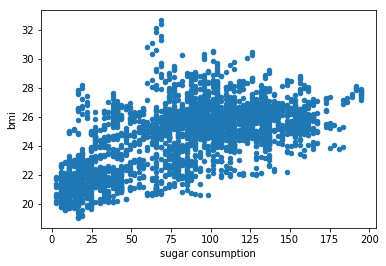

In [832]:
whs_country.plot(kind='scatter', x='sugar consumption', y='bmi');

> There is a positive corralation between sugar consumption and BMI, meaning that higher sugar intake is likely to result in a higher BMI. 

### What is the corrrelation between sugar consumption and the amount spent on health in the United States?

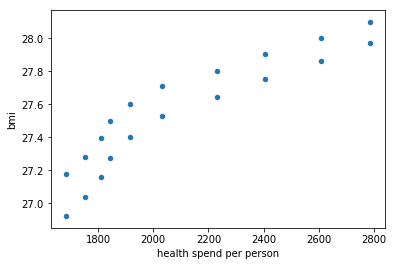

In [833]:
whs_us = whs_country.query('country == "United States"')

whs_us.plot(kind='scatter', x='health spend per person', y='bmi');

> The corralation between sugar consumption per person and the amount spent on health per person in the U.S is very strong. I've chosen to analyse individual countries for this as our results would be skewed if we looked at all countries together, given health care costs are very different throughout the world. To sense check this result, let's see how this graph looks for another country. 

#### Results for Ireland:

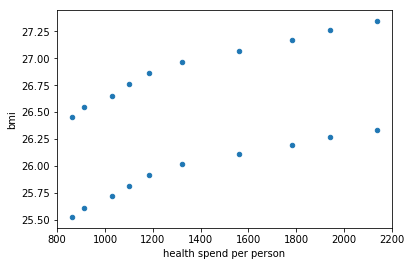

In [834]:
whs_irl = whs_country.query('country == "Ireland"')

whs_irl.plot(kind='scatter', x='health spend per person', y='bmi');

> We can again see a strong correlation here, with both lines following each other. 

### Is there a trend of sugar intake that can be seen across countries? 

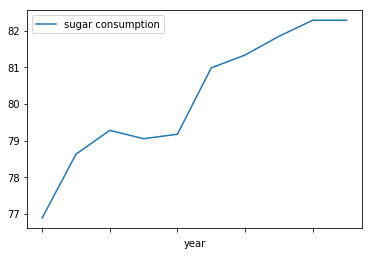

In [904]:
#get the average global sugar consumption per year
global_sc = whs.groupby('year').mean()
global_sc.plot(kind='line', y='sugar consumption')

> The global trend is that sugar intake has steadily increased in the decade between 1995 and 2004. 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!